# Intelligent Tagging and Recommendation System for StackOverflow Posts
### APAN 5430: Applied Text & Natural Language Analytics Term Project
#### Group 3
#### Group Members: Sixuan Li, Wenyang Cao, Haoran Yang, Wenling Zhou, Jake Xiao
#### Github Repo: [https://github.com/educated-fool/stack-overflow-intelligent-tagging](https://github.com/educated-fool/stack-overflow-intelligent-tagging)

## Introduction
This project aims to develop an intelligent tagging and recommendation system for StackOverflow posts. The system will leverage Natural Language Processing (NLP) techniques to predict appropriate tags for new posts and recommend similar posts based on their content.

## Data Description
The dataset for this project is obtained from [Kaggle StackOverflow Data](https://www.kaggle.com/datasets/stackoverflow/stacksample/data) and includes three main files:

1. **Questions.csv**:
   - Contains questions with fields such as Id, OwnerUserId, CreationDate, ClosedDate, Score, Title, and Body.
   - The Body field contains HTML content that needs to be cleaned before analysis.

2. **Answers.csv**:
   - Includes fields like Id, OwnerUserId, CreationDate, ParentId, Score, and Body.
   - Similar to questions, the Body field contains HTML content that needs cleaning.

3. **Tags.csv**:
   - Contains Id and Tag pairs, with each question associated with one or more tags.

## Text Processing

### Data Loading

In [4]:
import pandas as pd

In [5]:
questions_df = pd.read_csv('/Users/wenz/Desktop/CU Summer/5430 NLP/Project/Questions.csv',encoding='ISO-8859-1')

In [6]:
questions_df.head(5)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [7]:
print(f"Number of rows: {questions_df.shape[0]}")
print(f"Number of columns: {questions_df.shape[1]}")

Number of rows: 1264216
Number of columns: 7


In [8]:
answers_df = pd.read_csv('/Users/wenz/Desktop/CU Summer/5430 NLP/Project/Answers.csv',encoding='ISO-8859-1')
answers_df.head(5)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [9]:
tags_df = pd.read_csv('/Users/wenz/Desktop/CU Summer/5430 NLP/Project/Tags.csv',encoding='ISO-8859-1')
tags_df.head(5)

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [10]:
print(f"Number of rows: {tags_df.shape[0]}")
print(f"Number of columns: {tags_df.shape[1]}")

Number of rows: 3750994
Number of columns: 2


There is a one-to-many relationship between the `Questions` and `Tags` tables. Specifically, each question can have multiple tags, but in the `Tags` table, each record contains only a single question ID and tag pair.

### Data Preprocessing
The code handles null values, drops unnecessary columns, and combines tags with corresponding questions. It also prepares for later visualization and tokenization tasks.

In [11]:
# Check for null values in Questions dataframe
print("Null values in Questions dataframe:")
print(questions_df.isnull().sum())

# Check for null values in Answers dataframe
print("\nNull values in Answers dataframe:")
print(answers_df.isnull().sum())

# Check for null values in Tags dataframe
print("\nNull values in Tags dataframe:")
print(tags_df.isnull().sum())

Null values in Questions dataframe:
Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

Null values in Answers dataframe:
Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

Null values in Tags dataframe:
Id        0
Tag    1113
dtype: int64


In [12]:
# Count the frequency of each tag
tag_value_counts = tags_df["Tag"].value_counts()

# Select the top 50 tags based on their frequency
top_fifty_tags = tag_value_counts.head(50)

# Display the top 50 tags
top_fifty_tags

Tag
javascript        124155
java              115212
c#                101186
php                98808
android            90659
jquery             78542
python             64601
html               58976
c++                47591
ios                47009
mysql              42464
css                42308
sql                35782
asp.net            29970
objective-c        26922
ruby-on-rails      25789
.net               24059
c                  23238
iphone             21539
angularjs          20345
arrays             19799
sql-server         18160
json               17669
ruby               17013
r                  15701
ajax               15629
regex              15349
xml                14763
node.js            14525
asp.net-mvc        14284
linux              13395
django             12818
wpf                12365
database           11860
swift              11832
xcode              10633
string             10427
excel              10384
vb.net             10286
windows            10

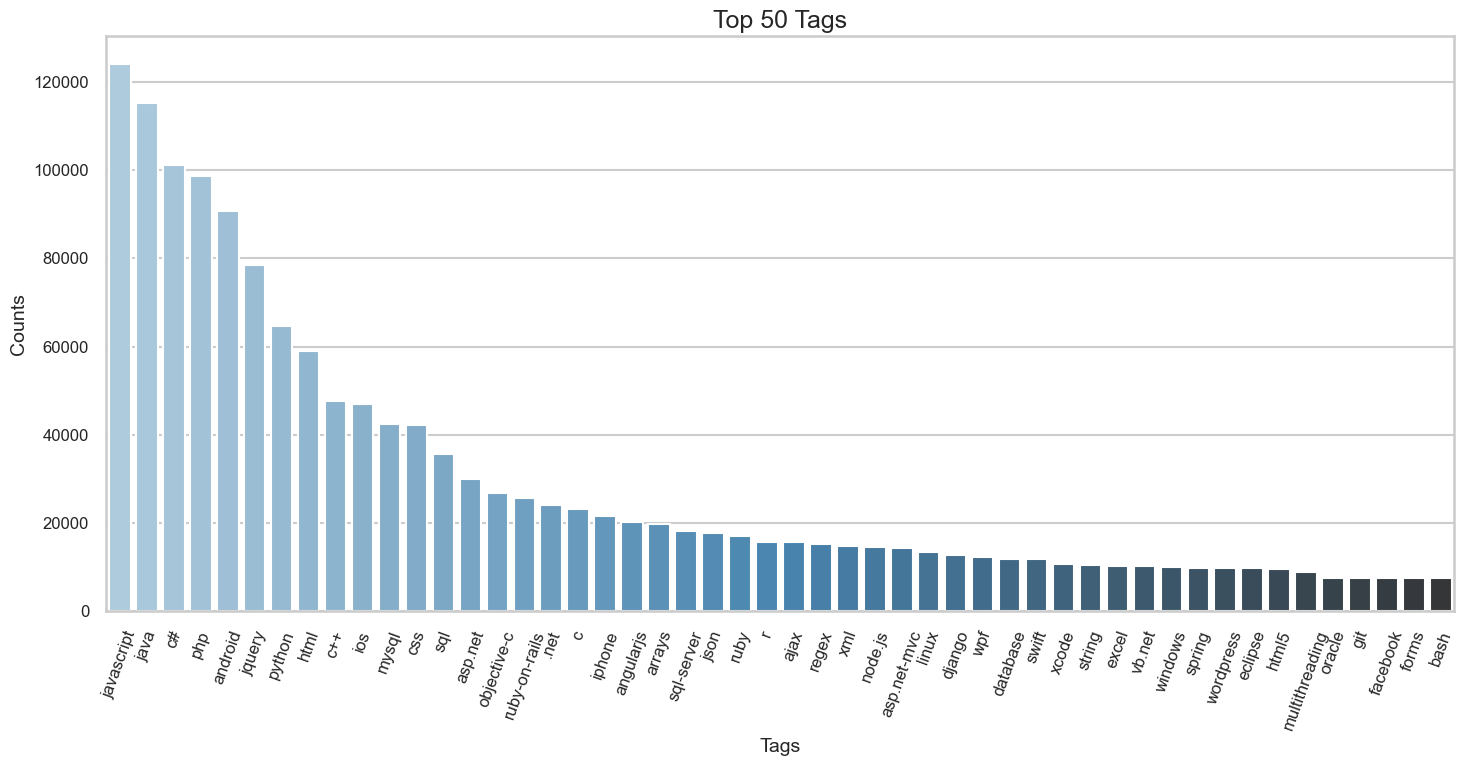

In [13]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create a figure and axis for the plot
plt.figure(figsize=(15, 8))

# Plot a bar chart of the top 50 tags
sns.barplot(x=top_fifty_tags.index, y=top_fifty_tags.values, palette="Blues_d", hue=top_fifty_tags.index, dodge=False)

# Set the labels and title
plt.xlabel('Tags', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Top 50 Tags', fontsize=18)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=70, fontsize=12)
plt.yticks(fontsize=12)

# Remove the legend
plt.legend([],[], frameon=False)

# Adjust the layout to fit all elements
plt.tight_layout()

# Display the plot
plt.show()

The distribution of questions per tag shows a clear long-tail pattern. To improve the efficiency of model training while maintaining high accuracy, we can focus on a subset of the most frequent tags.

In [14]:
# Set pandas option to display percentages with two decimal places
pd.options.display.float_format = "{:.2f}%".format

# Calculate the cumulative percentage of the top 4000 tags
cumulative_percentage_top_4000_tags = 100 * tag_value_counts.head(4000).cumsum() / tag_value_counts.sum()

# Display the cumulative percentage
cumulative_percentage_top_4000_tags

Tag
javascript            3.31%
java                  6.38%
c#                    9.08%
php                  11.72%
android              14.13%
                      ...  
dc.js                89.94%
sunspot              89.94%
singly-linked-list   89.94%
hadoop-streaming     89.95%
metrics              89.95%
Name: count, Length: 4000, dtype: float64

#### Standardizing Column Names and Merging Data

In [15]:
# Standardize column names to lowercase
for df in [questions_df, tags_df]:
    df.columns = df.columns.str.lower()

# Group tags by question ID
tags_per_question_df = tags_df.groupby(['id'])['tag'].apply(list)

# Merge the relevant columns from questions_df with the grouped tags
questions_tags_df = questions_df[["id", "title", "body"]].merge(tags_per_question_df.to_frame(), on="id")

# Add a column for the count of tags per question
questions_tags_df["tag_count"] = questions_tags_df["tag"].apply(len)

# Display the first few rows of the merged dataframe
questions_tags_df.head()

,id,title,body,tag,tag_count
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[flex, actionscript-3, air]",3
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[svn, tortoisesvn, branch, branching-and-merging]",4
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net, sitemap]",3
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,"[algorithm, language-agnostic, colors, color-s...",4
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net, scripting, compiler-construction]",4


#### HTML Cleaning and Special Character Removal

In [16]:
from bs4 import BeautifulSoup
import re

# Function to clean HTML content
def clean_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function to remove special characters
def remove_special_characters(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()

In [17]:
from tqdm import tqdm
tqdm.pandas()

In [18]:
from tqdm import tqdm
tqdm.pandas()

questions_tags_df["title"] = questions_tags_df["title"].progress_apply(remove_special_characters)
questions_tags_df["body"] = questions_tags_df["body"].progress_apply(clean_html).progress_apply(remove_special_characters)


  0%|          | 0/1264216 [00:00<?, ?it/s]

100%|██████████| 1264216/1264216 [02:15<00:00, 9345.67it/s]


In [19]:
questions_tags_df.head()

,id,title,body,tag,tag_count
0,80,SQLStatement execute multiple queries in one s...,I ve written a database generation script in S...,"[flex, actionscript-3, air]",3
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...,"[svn, tortoisesvn, branch, branching-and-merging]",4
2,120,ASP NET Site Maps,Has anyone got experience creating SQL based A...,"[sql, asp.net, sitemap]",3
3,180,Function for creating color wheels,This is something I ve pseudo solved many time...,"[algorithm, language-agnostic, colors, color-s...",4
4,260,Adding scripting functionality to NET applicat...,I have a little game written in C It uses a da...,"[c#, .net, scripting, compiler-construction]",4


### Lemmatization and Tokenization

This section preprocesses text data by performing lemmatization and tokenization, while also removing stopwords and handling multi-word expressions. By converting text to lowercase and breaking it into meaningful tokens, we ensure that only relevant words are retained. Multi-word expressions like "c++" are treated as single tokens to preserve their meaning. The cleaned tokens are then prepared for feature extraction and vectorization, which are crucial steps for training NLP models.

In [20]:
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.mwe import MWETokenizer

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the spaCy model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Initialize the WordNetLemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define common multi-word expressions to be treated as single tokens
topics_with_symbols = ["c#", "c++", ".net", "asp.net", "node.js", "objective-c", "unity3d", "html5", "css3", 
                       "d3.js", "utf-8", "neo4j", "scikit-learn", "f#", "3d", "x86"]

# Initialize the MWE Tokenizer
mwe_tokenizer = MWETokenizer(separator="")
mwe_tokenizer.add_mwe(("c", "#"))
mwe_tokenizer.add_mwe(("c", "+", "+"))
mwe_tokenizer.add_mwe(("f", "#"))

[nltk_data] Downloading package punkt to /Users/wenz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/wenz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/wenz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    words = word_tokenize(text)  # Tokenize text into words
    
    # Remove stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() or word in list("+#") + topics_with_symbols]
    words = [word for word in words if word.lower() not in stop_words]

    # Multi-Word Expression (MWE) Processing
    words = mwe_tokenizer.tokenize(words)
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize words
    return words

In [22]:
questions_tags_df["body_tokenized"] = questions_tags_df["body"].progress_apply(preprocess_text)

100%|██████████| 1264216/1264216 [16:10<00:00, 1302.34it/s]


In [23]:
questions_tags_df["title_tokenized"] = questions_tags_df["title"].progress_apply(preprocess_text)

  0%|          | 0/1264216 [00:00<?, ?it/s]

100%|██████████| 1264216/1264216 [04:54<00:00, 4287.28it/s] 


In [24]:
questions_tags_df.sample(5)

,id,title,body,tag,tag_count,body_tokenized,title_tokenized
731244,24842900,Embedding Russian language edition of Ukraine ...,Until recently Google Maps offered a Russian l...,"[google-maps, localization, embedding]",3,"[recently, google, map, offered, russian, lang...","[embedding, russian, language, edition, ukrain..."
376093,13377750,iOS Not the typical background location tracki...,i m developing a sample app that tracks the us...,"[ios, background, nstimer, core-location, obje...",5,"[developing, sample, app, track, user, positio...","[io, typical, background, location, tracking, ..."
492360,17171450,How to reload webview in AppDelegate when tab ...,im new in iOs development and i cant solve thi...,[ios],1,"[im, new, io, development, cant, solve, proble...","[reload, webview, appdelegate, tab, selected, io]"
313503,11345260,How to determine height of the toolbar in UINa...,I have a view with a toolbar presented by a UI...,"[iphone, objective-c, ios, uiview, uikit]",5,"[view, toolbar, presented, uinavigationcontrol...","[determine, height, toolbar, uinavigationcontr..."
38833,1920980,How can I define in Visual Studio a new constant,I need to define a new constant in Visual Stud...,[visual-studio-2008],1,"[need, define, new, constant, visual, studio, ...","[define, visual, studio, new, constant]"


In [26]:
questions_tags_df.to_pickle("/Users/wenz/Desktop/CU Summer/5430 NLP/Project/tp1.pkl")

#### Filtering Tags and Vectorization

Analysis of the cumulative frequency distribution reveals that the top 4,000 tags account for 90% of the content. To ensure efficiency and relevance, we will focus on these top 4,000 tags for further analysis. By filtering our dataset to include only these frequently occurring tags, we reduce its dimensionality and enhance the efficiency of subsequent analysis and model training.

In [27]:
from collections import Counter

# Count the frequency of each tag
tag_count = Counter(tag for tags in questions_tags_df['tag'] for tag in tags)

# Identify the top 4,000 most common tags
top_common_tags = [count[0] for count in tag_count.most_common(4000)]

# Filter the tags in the dataset to retain only the top 4,000 tags
questions_tags_df["tag"] = questions_tags_df["tag"].progress_apply(
    lambda tags: [tag for tag in tags if tag in top_common_tags]
)

100%|██████████| 1264216/1264216 [03:47<00:00, 5552.81it/s] 


##### TF-IDF Vectorization for Titles and Bodies

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Define a dummy tokenizer function that returns the input string as is
def dummy_tokenizer(string):
    return string

# Create a TfidfVectorizer for the titles with specified parameters
title_vectorizer = TfidfVectorizer(tokenizer=dummy_tokenizer, lowercase=False, max_features=10000)

# Fit and transform the tokenized titles to TF-IDF vectors
x_title = title_vectorizer.fit_transform(questions_tags_df["title_tokenized"])

# Create a TfidfVectorizer for the bodies with specified parameters
body_vectorizer = TfidfVectorizer(tokenizer=dummy_tokenizer, lowercase=False, max_features=100000)

# Fit and transform the tokenized bodies to TF-IDF vectors
x_body = body_vectorizer.fit_transform(questions_tags_df["body_tokenized"])

# Convert the first 50 TF-IDF title vectors to a DataFrame, get feature names
title_df = pd.DataFrame(x_title[:50].toarray(), columns=title_vectorizer.get_feature_names_out())
top_title_features = title_df.iloc[10].sort_values(ascending=False).where(lambda v: v > 0).dropna().head(15)

# Display the top 15 features for a sample title vector
print("Top 15 TF-IDF features for a sample title vector:")
print(top_title_features)

# Convert the first 50 TF-IDF body vectors to a DataFrame, get feature names
body_df = pd.DataFrame(x_body[:50].toarray(), columns=body_vectorizer.get_feature_names_out())
top_body_features = body_df.iloc[10].sort_values(ascending=False).where(lambda v: v > 0).dropna().head(15)

# Display the top 15 features for a sample body vector
print("\nTop 15 TF-IDF features for a sample body vector:")
print(top_body_features)

/Users/wenz/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Top 15 TF-IDF features for a sample title vector:
recordset   0.68%
connect     0.44%
loop        0.38%
database    0.34%
c           0.28%
Name: 10, dtype: float64

Top 15 TF-IDF features for a sample body vector:
simplest   0.60%
connect    0.38%
record     0.38%
query      0.31%
database   0.30%
c          0.25%
set        0.24%
way        0.22%
Name: 10, dtype: float64


#### Identifying and Removing Duplicate Titles

In [29]:
# Identify duplicate titles
duplicates = questions_tags_df.title.duplicated()

# Print the boolean series indicating duplicates
print(duplicates)

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

0          False
1          False
2          False
3          False
4          False
           ...  
1264211    False
1264212    False
1264213    False
1264214    False
1264215    False
Name: title, Length: 1264216, dtype: bool
Number of duplicate rows: 499


Given the relatively low amount of duplicate data in our dataset, we chose a standard deduplication approach. This method efficiently removes exact duplicates by comparing specific fields, such as titles, which meets our current requirements. Although we considered using MinHash for more accurately detecting records with similar content, it proved to be too time-consuming.

In [30]:
# Remove duplicate titles, keeping the first occurrence
questions_tags_df_deduplicated = questions_tags_df.drop_duplicates(subset='title', keep='first')

# Identify duplicates after deduplication
duplicates_after = questions_tags_df_deduplicated.title.duplicated()

# Count the number of duplicate rows after deduplication
num_duplicates_after = duplicates_after.sum()

# Print the number of duplicate rows after deduplication
print(f"Number of duplicate rows: {num_duplicates_after}")

Number of duplicate rows: 0


### LDA Topic Modeling With Gensim & pyLDAvis

Using LDA with Gensim has several benefits: CountVectorizer efficiently preprocesses text data by converting it into numerical format, creating a vocabulary, and generating a token count matrix, essential for LDA topic modeling. Gensim's LDA model is optimized for large datasets, helping to uncover hidden topics and providing various tuning options to enhance performance. Finally, pyLDAvis offers an intuitive, interactive visualization of LDA models, making it easier to explore and understand the topics and their associated terms, allowing for deeper insights into the data.

In [31]:
titles = questions_tags_df_deduplicated['title_tokenized']
titles[:10]

0    [sqlstatement, execute, multiple, query, one, ...
1    [good, branching, merging, tutorial, tortoisesvn]
2                                [asp, net, site, map]
3                   [function, creating, color, wheel]
4    [adding, scripting, functionality, net, applic...
5                           [use, nested, class, case]
6               [homegrown, consumption, web, service]
7       [deploying, sql, server, database, test, live]
8             [automatically, update, version, number]
9    [visual, studio, setup, project, per, user, re...
Name: title_tokenized, dtype: object

In [32]:
from gensim.corpora import Dictionary

# Create a dictionary that maps tokens to indices
# The dictionary is created using tokens from the titles
dictionary = Dictionary(titles)

# Number of raw tokens
print(f"Number of raw tokens: {len(dictionary.items())}")

Number of raw tokens: 121518


In [33]:
# Filter out tokens that appear less than 10 times and those that appear in more than 80% of the titles
dictionary.filter_extremes(no_below=10, no_above=0.8)

# The number of tokens after filtering
print(f"Number of tokens after filtering: {len(dictionary.items())}")

Number of tokens after filtering: 16752


In [34]:
# Using the dictionary to convert titles into lists of tuples (index, count)
corpora = [dictionary.doc2bow(doc) for doc in titles]

In [35]:
# Display the lists of tuples for the two randomly selected titles 
i = 100
print('Original title:', questions_tags_df_deduplicated['title'].iloc[i])
print('Token representation:', titles[i])
print('Tuple (Index, count) representation:', corpora[i])
print()

Original title: What are the useful new ASP NET features in the NET Framework 3 5
Token representation: ['useful', 'new', 'asp', 'net', 'feature', 'net', 'framework']
Tuple (Index, count) representation: [(10, 1), (12, 2), (333, 1), (334, 1), (335, 1), (336, 1)]



### Training LDA Model

In [36]:
from gensim.models import ldamodel

# Train an LDA model
lda_model = ldamodel.LdaModel(corpora, num_topics=10, id2word=dictionary, passes=50)

### Visualizing LDA Topics with pyLDAvis

In [37]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Prepare the visualization data
vis_data = gensimvis.prepare(lda_model, corpora, dictionary)

# Enable pyLDAvis in the notebook
pyLDAvis.enable_notebook()

# Display the interactive visualization
pyLDAvis.display(vis_data)

### Evaluating LDA Model

In [43]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

#  Perplexity
perplexity = lda_model.log_perplexity(corpora)
print('\nPerplexity: ', perplexity)  # a measure of how good the model is. lower the better.

# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=titles, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.221812828255267

Coherence Score:  0.2888966970234389


A lower Perplexity value indicates a better fit of the model to the data. In this case, the Perplexity value of -8.221812828255267 suggests that the model has a reasonable fit, but since Perplexity alone doesn't provide a complete picture, it is essential to consider the Coherence Score as well. The score of 0.2888966970234389 indicates that the topics generated by the model have a good level of coherence. This means the model has successfully identified semantically consistent topics, which are valuable for understanding the themes within the data.

This LDA model demonstrates good performance with a strong fit to the data, as evidenced by its low Perplexity value. The moderate Coherence Score further highlights the model's ability to produce meaningful and interpretable topics. These results indicate that the model is well-constructed and effective in capturing the essential themes in the dataset. 